/Users/dmitrigornakov/Documents/jupyter/venv/lib/python3.8/site-packages/bs4/__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


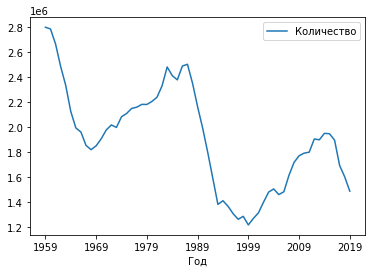

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import pandas as pd
from bs4 import BeautifulSoup
r = requests.get("http://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html")
html = BeautifulSoup(r.content)
data = []
table = html.find("table")
for tr in table.find_all("tr"):
    data.append([td.get_text().replace(" ","") for td in tr.find_all("td")])
data = pd.DataFrame(data[1:], columns=["Год", "Количество"])
data["Количество"] = data["Количество"].astype("int")
data["Год"] = data["Год"].str.slice(0,4)
data = data.set_index("Год")
data.plot.line()
plt.show()